- Started on Oct 21
- To do the splines problem from HW2

In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

In [2]:
data = np.loadtxt('glass_cleaned.txt')

In [ ]:
x_train = data[:,0]
y_train = data[:,1]

In [ ]:
plt.scatter(x_train,y_train)

In [3]:
# Sort the data according to the training data column because spline needs that
data_sorted = data[data[:,0].argsort()]

In [4]:
# function: remove duplicate input variable entries by averaging corresponding output values
def groupby_mean(a):
    # Sort array by groupby column
    b = a[a[:,0].argsort()]

    # Get interval indices for the sorted groupby col
    idx = np.flatnonzero(np.r_[True,b[:-1,0]!=b[1:,0],True])

    # Get counts of each group and sum rows based on the groupings & hence averages
    counts = np.diff(idx)
    avg = np.add.reduceat(b[:,1:],idx[:-1],axis=0)/counts.astype(float)[:,None]

    # Finally concatenate for the output in desired format
    return np.c_[b[idx[:-1],0],avg]

In [5]:
# Remove the duplicate entries for inputs by averaging together corresponding outputs
# Spline needs every covariate (i.e. input) to be unique, no repetitions
data_sorted_dups_removed = groupby_mean(data_sorted)

In [8]:
# Fit the splines with different choices of smoothing parameter s
spline_10 = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=10)
spline_250 = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=250)
spline_500 = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=500)
spline_1000 = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=1000)

Text(0.5, 1.0, 'Influence of smoothing parameter s')

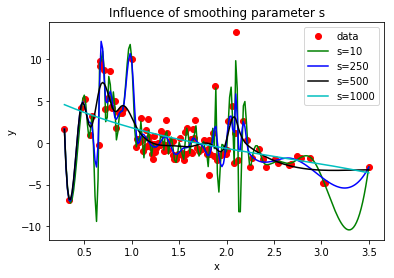

In [51]:
x_test = np.linspace(0.29, 3.50, 200)
plt.plot(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],'ro',label='data')
plt.plot(x_test, spline_10(x_test), 'g',label='s=10')
plt.plot(x_test, spline_250(x_test), 'b',label='s=250')
plt.plot(x_test, spline_500(x_test), 'k',label='s=500')
plt.plot(x_test, spline_1000(x_test), 'c',label='s=1000')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Influence of smoothing parameter s')

#### Part 2: Dataset D
- $r(x) = cos(12 \pi x), 0 \leq x<1$
- $r(x) = x, 1\leq x \leq 2$

In [20]:
# Reading data
# First manually removed serial numbers and column labels to only leave 2 cols with values
# genfromtxt function enables converting txt to float which wasn't possible with np.loadtxt
d = np.genfromtxt('c2data_cleaned.csv', delimiter=',')

In [23]:
c =2
0<c and c<3

True

In [35]:
x = np.linspace(0,10,10)
x.shape[0]

10

In [36]:
def true_func(x):
    if 0<=x and x<1:
        return np.cos(12*np.pi*x)
    if 1<=x and x<=2:
        return x

In [37]:
v_true_func = np.vectorize(true_func)

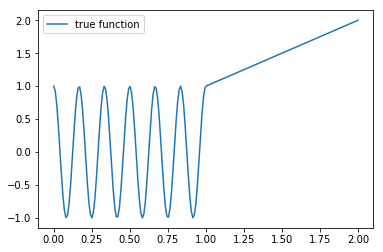

In [41]:
true_x = np.linspace(0.0, 2.0, 200)
true_y = v_true_func(true_x)
plt.plot(true_x,true_y,label='true function')
plt.legend()

In [49]:
# For julia to load in the provided noisy data for plotting
np.savetxt("c2_provided_data.txt",d)

In [43]:
spline_D = UnivariateSpline(d[:,0],d[:,1],s=30)

In [48]:
# For julia to be able to load in the resulting estimates from spline
np.savetxt("spline.txt",spline_D(x_test_d))

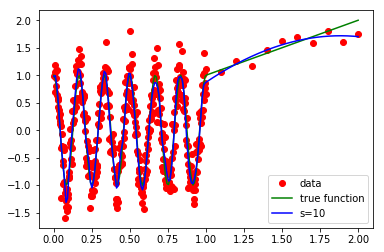

In [44]:
x_test_d = np.linspace(0.0, 2.0, 200)
plt.plot(d[:,0],d[:,1],'ro',label='data')
plt.plot(true_x,true_y,'g',label='true function')
plt.plot(x_test_d, spline_D(x_test_d), 'b',label='s=10')
plt.legend()